# Introduction

## Project Objective
The main goal of this project is to develop a supervised learning model capable of predicting the risk of obesity based on various factors. This model aims to classify individuals into different obesity risk categories, which can significantly aid in health assessments and preventive measures.

This notebook can also be found under: https://github.com/MedGhassen/DTSA-5509-Supervised-Learning-Final-Project

## Data Source Description
The dataset for this project comes from the Kaggle Playground Series Season 4, Episode 2 competition. It includes multiple features that are potentially related to obesity risk, such as dietary habits, physical activity levels, and demographic factors. The data is used for developing and testing predictive models in a multi-class classification framework.
Link: https://www.kaggle.com/competitions/playground-series-s4e2/data


#2. Data Preparation and Exploratory Data Analysis (EDA)



##Data Collection
The dataset was obtained from the Kaggle Playground Series S4E2 competition. It consists of various features related to individual health and lifestyle choices that are potential indicators of obesity risk.

We will download the data from Kaggle using the following code. Please note the code is copied from Kaggle.

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F68479%2F7609535%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240304%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240304T231132Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D048616e5a5357a0aef0ce72abee54087d2317179796b168d3acfe8c5f567a7ca0e0b7687fbd8ac35ad4cb576bfdc6a497dbae34806c165a8a36ac554408100173bc09561ce442116771f1c79d1334aed6e5a4c94287c5c0324cece9184d595a7b356aa7d975cbfda69476eb1a7b4b7e1f3d71bbc7644abf0fbcd24a7932bc6a870b755be7bd8fd87f8c094a1960022278e6729e833263c2debf20413dcf3df605ddd0ebcf34f4df340dee60735e1637b68d1b4d659e96eb852da68084becf8614e050852ef1184858e5c400288eaff3d42b5a93af1ab98069b0dc001b4fcbbe11488b4388b91c32b73a26bb368cdbd036a86c1271aa4919d93d3871af9196168'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 939479 bytes downloaded
Downloaded and uncompressed: playground-series-s4e2
Data source import complete.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/test.csv


We would load the data into Train and test dataframes:

In [3]:
filePathTrain = '/kaggle/input/playground-series-s4e2/train.csv'
train_data = pd.read_csv(filePathTrain)
filePathTest = '/kaggle/input/playground-series-s4e2/test.csv'
test_data = pd.read_csv(filePathTest)
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


## Data Cleaning
For a comprehensive data cleaning process, we will follow these steps:

**1.Handle Missing Values:** Check for any missing data in each column and decide on a strategy for handling them (e.g., imputation, deletion).

In [5]:
missing_values = train_data.isnull().sum()
missing_values

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

As we can see the data does not have any missing values.

**2.Correct Data Types:** Ensure each column is of the correct data type (e.g., numerical, categorical)

In [6]:
# Display data types of all columns
train_data.dtypes


id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


Based on the dataset structure and the types of data in each column:

- **'id'**: This appears to be an identifier for each row and should not be used in analysis. We want to set it as the index.



In [7]:
train_data.set_index('id', inplace=True)

- 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad': These columns are categorical and should be converted to a 'category' data type. This conversion can save memory and make some types of analysis more straightforward.



In [8]:
# Convert categorical columns to 'category' data type
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
train_data[categorical_cols] = train_data[categorical_cols].astype('category')

# Confirm changes
train_data.dtypes

Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                             category
CH2O                               float64
SCC                               category
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
NObeyesdad                        category
dtype: object

- 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE': These columns appear to be numeric and likely should remain as float or integer types unless there's a specific reason to change them (e.g., 'Age' could technically be integer if you're not requiring fractional ages).

**3.Remove or Correct Outliers**
Removing or correcting outliers involves identifying extreme values in our dataset that may skew our analysis. There are several methods to handle outliers, but a common approach is using the IQR (Interquartile Range) method.

In [9]:
Q1 = train_data.quantile(0.25, numeric_only=True)
Q3 = train_data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers - We need to ensure we only apply the comparison to numeric columns
# First, identify numeric columns
numeric_cols = train_data.select_dtypes(include='number').columns

# Then, create a mask for rows to keep
mask = ((train_data[numeric_cols] >= lower_bound) & (train_data[numeric_cols] <= upper_bound)).all(axis=1)

# Apply the mask to the DataFrame
train_df_clean = train_data[mask]

# Display the shapes of the original and cleaned dataframes
print('Original DataFrame shape:', train_data.shape)
print('Cleaned DataFrame shape:', train_df_clean.shape)
train_df_clean

Original DataFrame shape: (20758, 17)
Cleaned DataFrame shape: (14040, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.0,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.0,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.0,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.0,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.0,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20749,Female,25.783865,1.646390,104.835346,yes,yes,3.000000,3.0,Sometimes,no,1.530992,no,0.015860,0.445495,Sometimes,Public_Transportation,Obesity_Type_III
20751,Female,21.030909,1.605495,133.466763,yes,yes,3.000000,3.0,Sometimes,no,2.839069,no,1.683497,0.143675,Sometimes,Public_Transportation,Obesity_Type_III
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.0,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Reset the index if 'id' is currently set as the index, this will move 'id' back to a regular column
train_df_clean = train_df_clean.reset_index(drop=True)

# Identify categorical and numerical columns
categorical_cols = [col for col in train_df_clean.columns if train_df_clean[col].dtype == 'category' and col != 'NObeyesdad']
numerical_cols = [col for col in train_df_clean.columns if train_df_clean[col].dtype in ['int64', 'float64'] and col != 'id']  # Assuming 'id' is not relevant

# Define the transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the dataset into features and target variable
X = train_df_clean.drop(columns=['NObeyesdad'])
y = train_df_clean['NObeyesdad']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the preprocessor on the training data and transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

## Data Exploration
For the Data Exploration, we will analyze your dataset to understand its characteristics and insights.

**Summary Statistics:** Provides an overview of the numerical data.

In [ ]:
train_df_clean.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,14040.000000,14040.000000,14040.000000,14040.000000,14040.000000,14040.0,14040.000000,14040.000000,14040.000000
mean,10392.729274,23.097854,1.705260,91.755340,2.511081,3.0,2.096725,0.966471,0.655345
std,6001.155309,4.054877,0.081921,27.429895,0.539485,0.0,0.603256,0.853648,0.576959
min,1.000000,14.000000,1.450000,39.000000,1.000000,3.0,1.000000,0.000000,0.000000
25%,5205.750000,20.000000,1.640000,68.000000,2.000000,3.0,1.998986,0.000000,0.026575
50%,10431.500000,22.866369,1.700000,95.000000,2.902197,3.0,2.000000,1.000000,0.673009
75%,15599.250000,26.000000,1.763215,111.993054,3.000000,3.0,2.627569,1.548068,1.000000
max,20757.000000,35.000000,1.947406,165.057269,3.000000,3.0,3.000000,3.000000,2.000000


**Distribution of Numerical Features:** Helps to understand the distribution of numerical data.

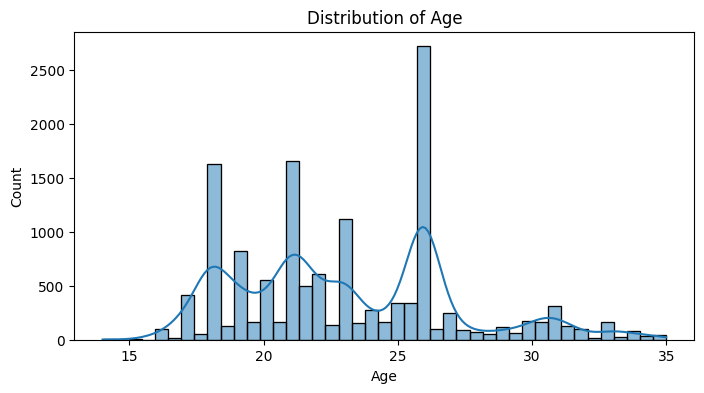

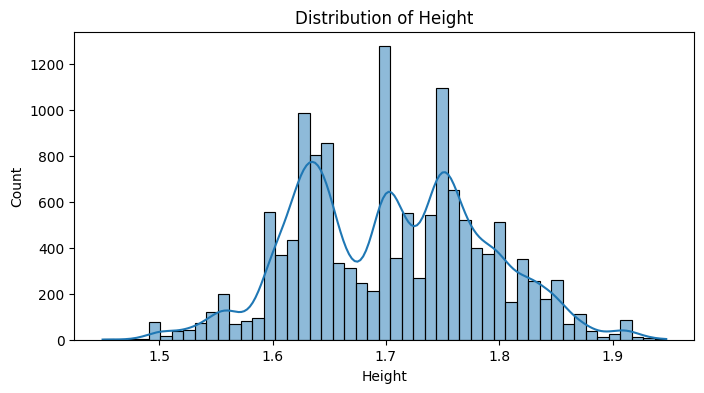

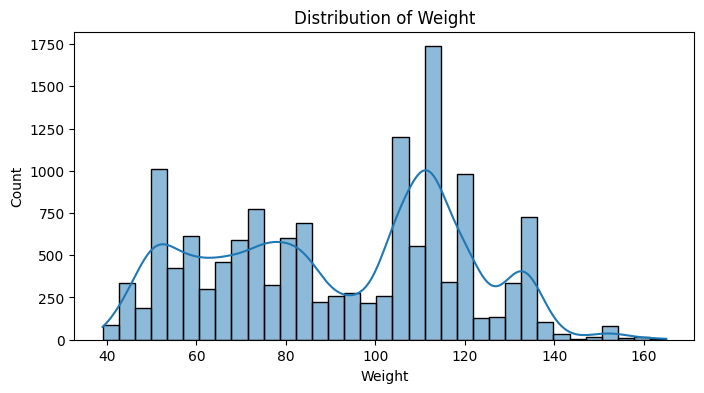

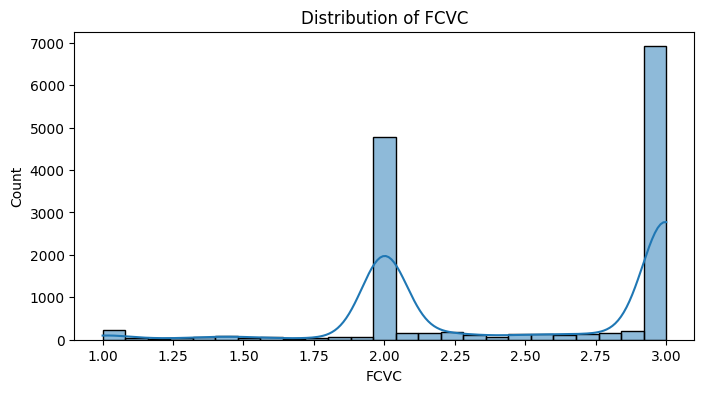

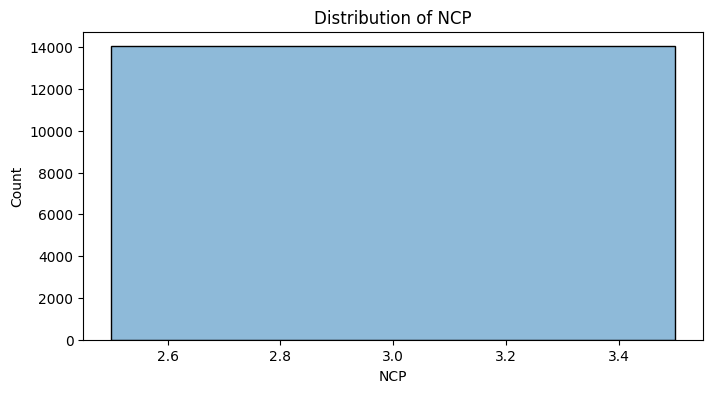

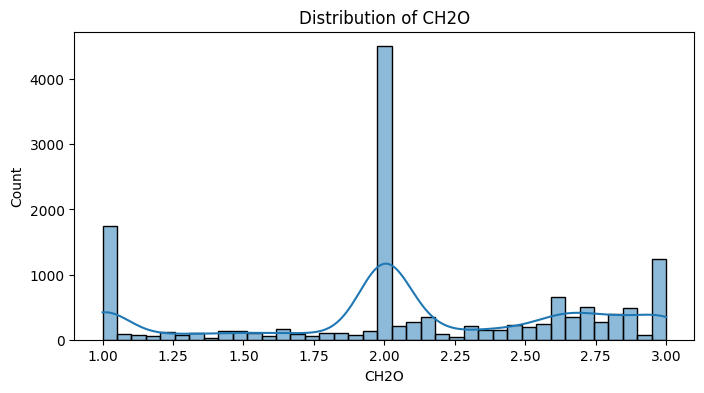

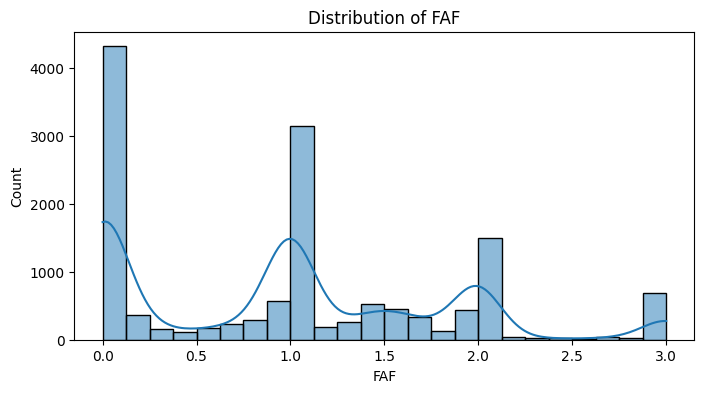

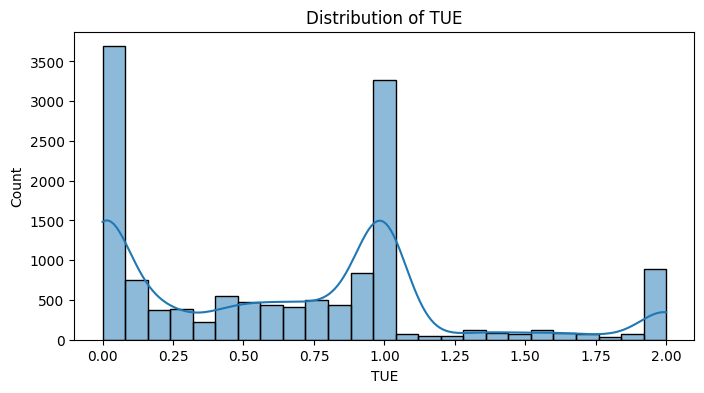

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions of numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Count of Categorical Features:** Shows the frequency of categories.

In [ ]:
# Plotting counts of categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=train_df_clean)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

**Correlation Matrix:** Identifies the relationship between numerical features.

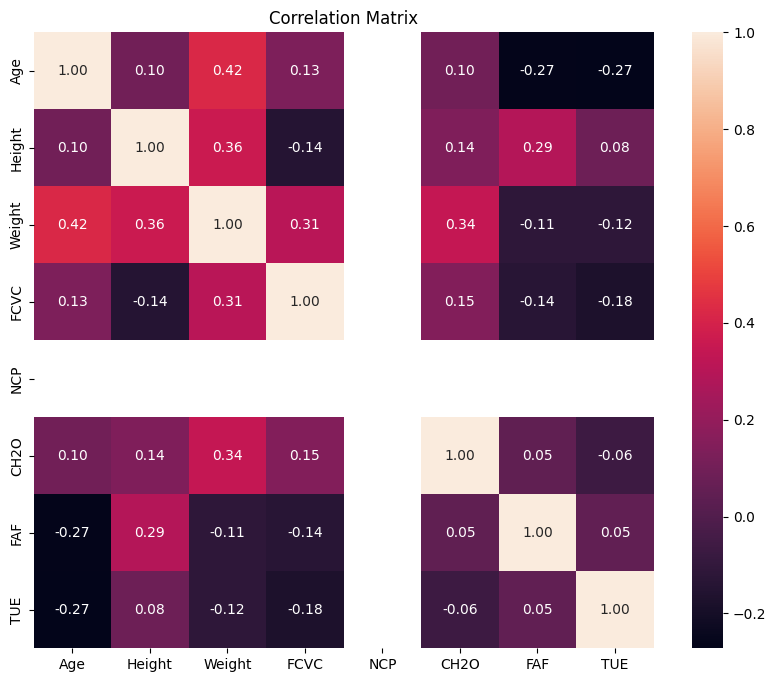

In [ ]:
# Displaying the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_df_clean[numerical_cols].corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Pairplot:** Visualizes pairwise relationships in the dataset.

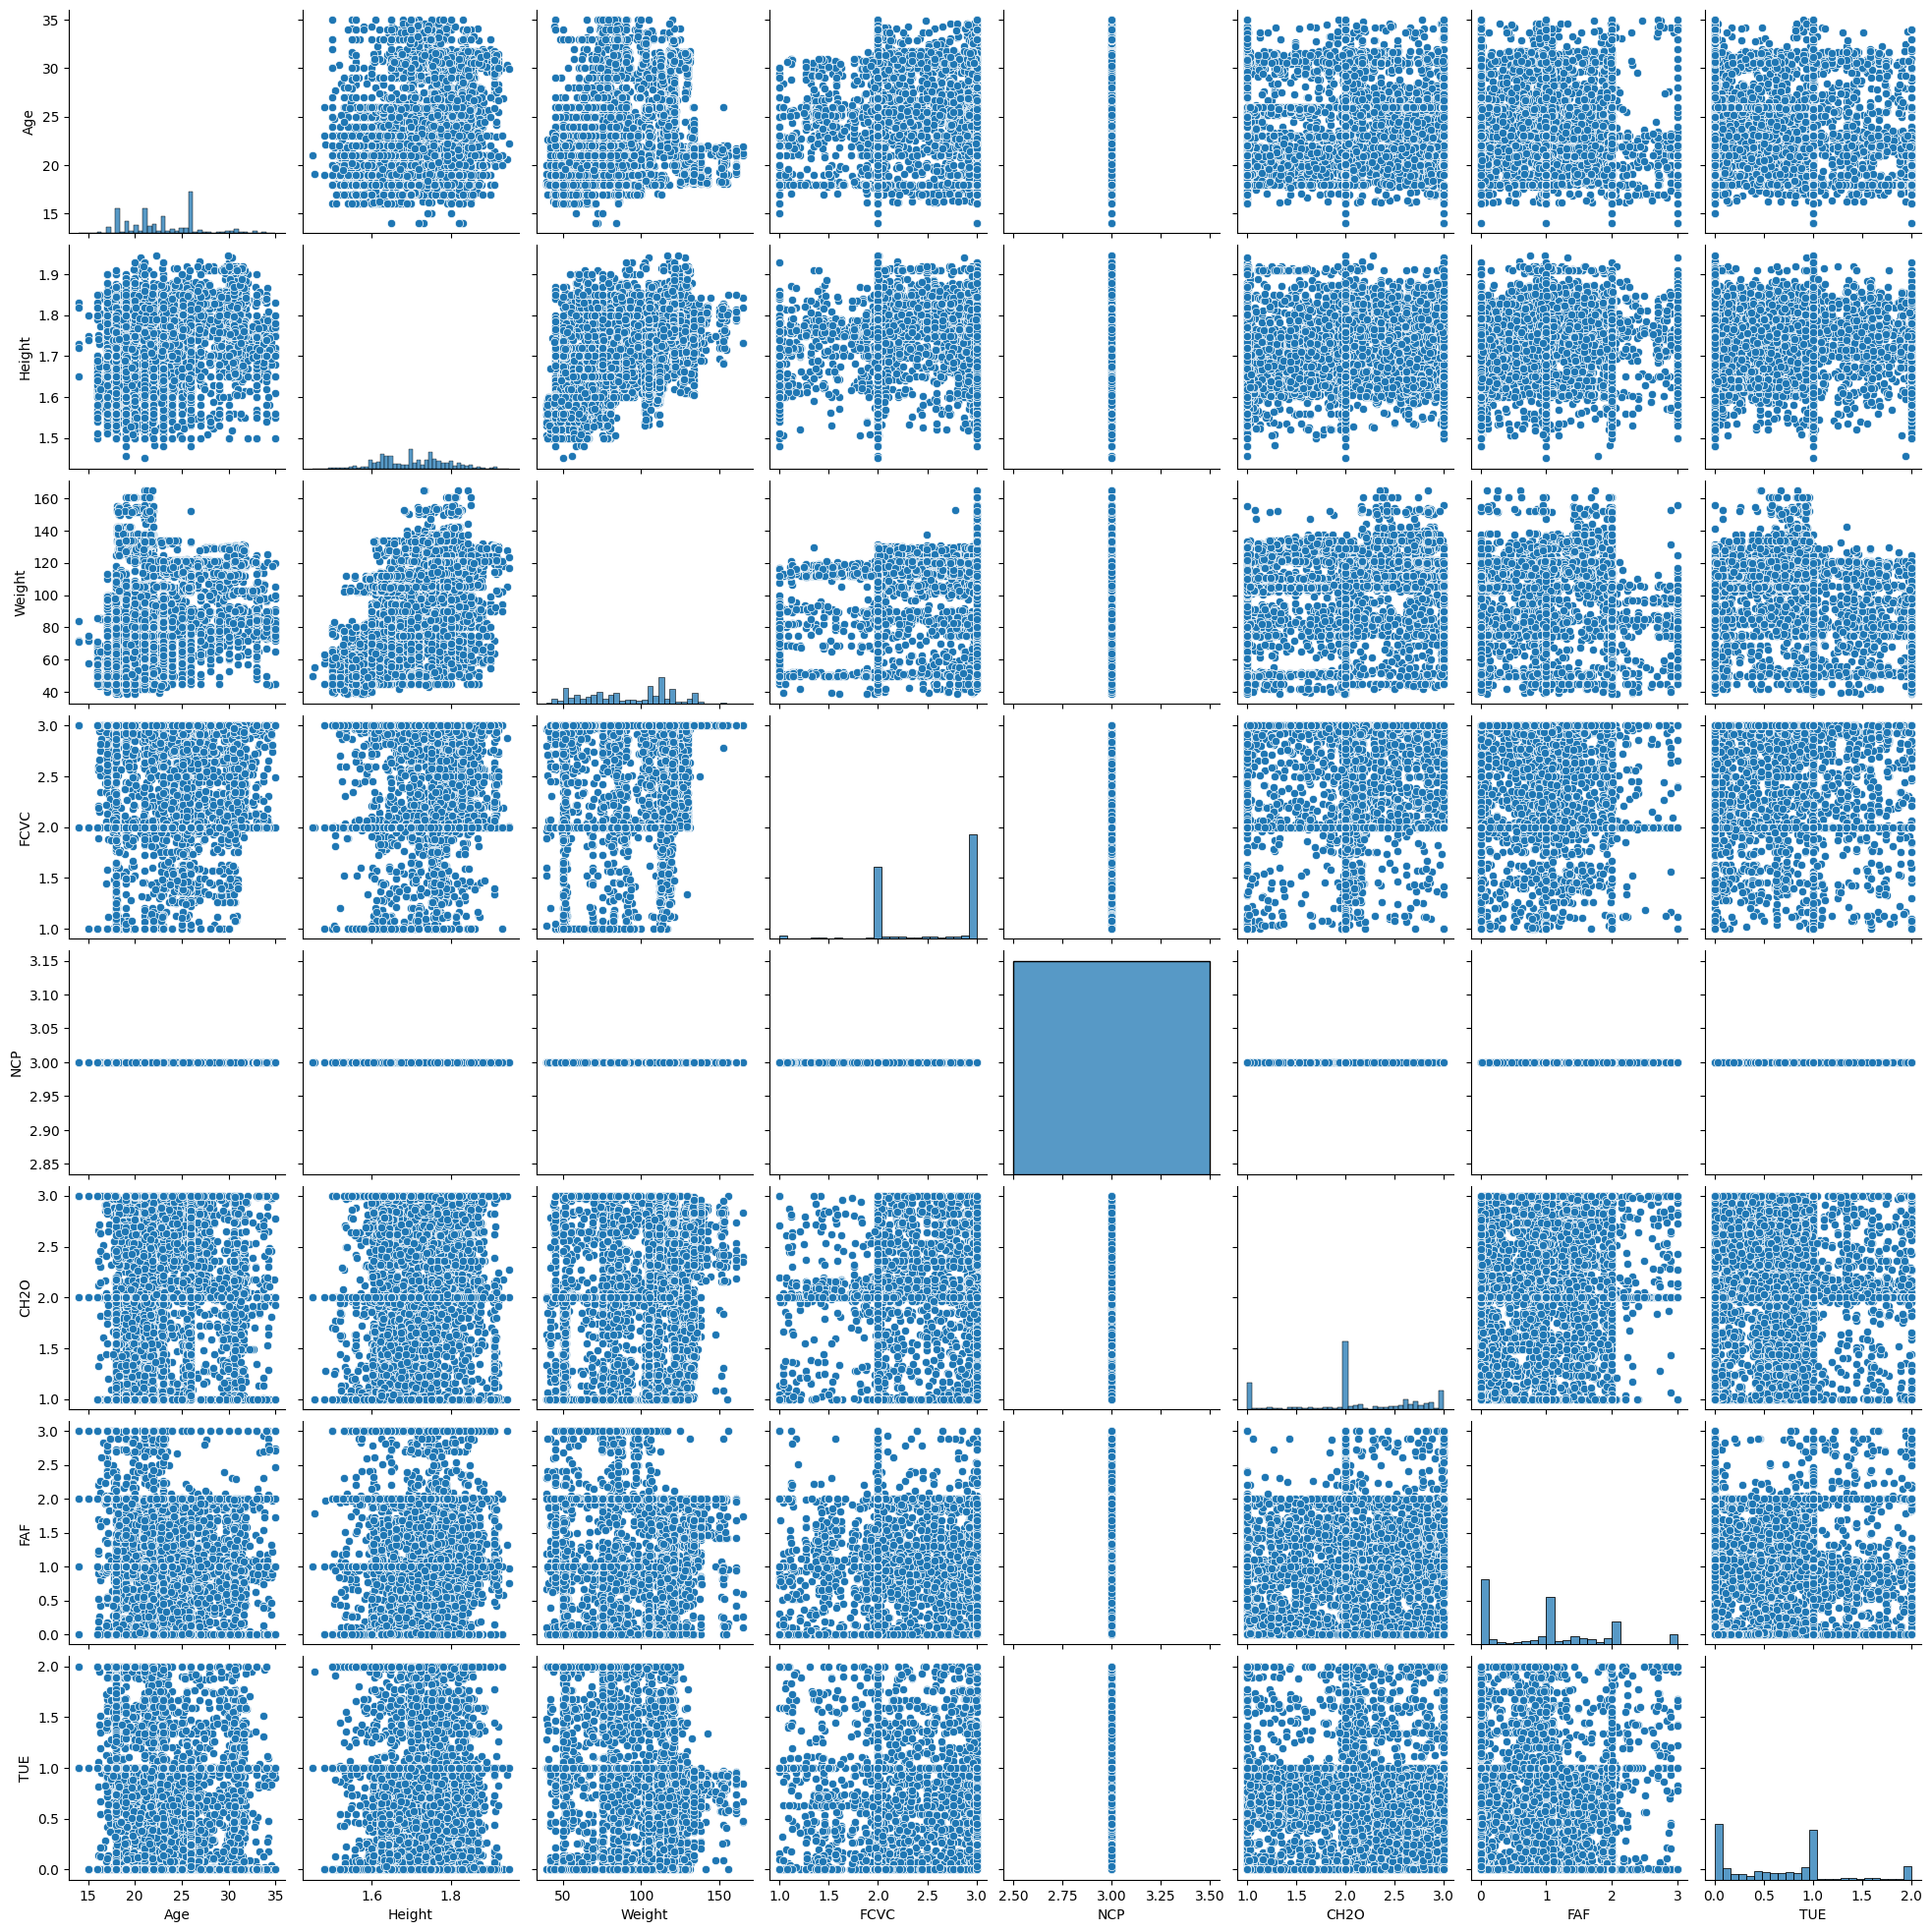

In [ ]:
# Pairplot for numerical columns
sns.pairplot(train_df_clean[numerical_cols])
plt.show()

**Box Plots for Outliers:** Identifies outliers in the numerical data.

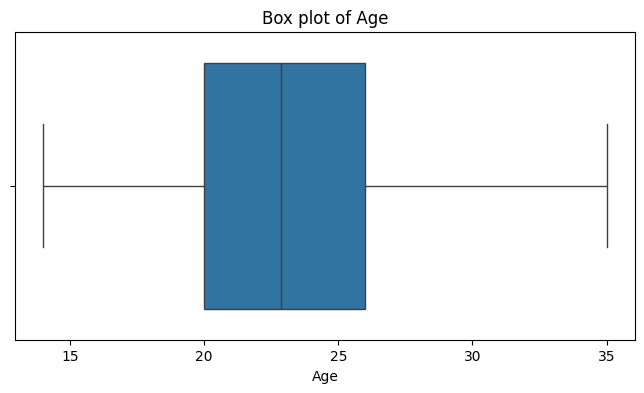

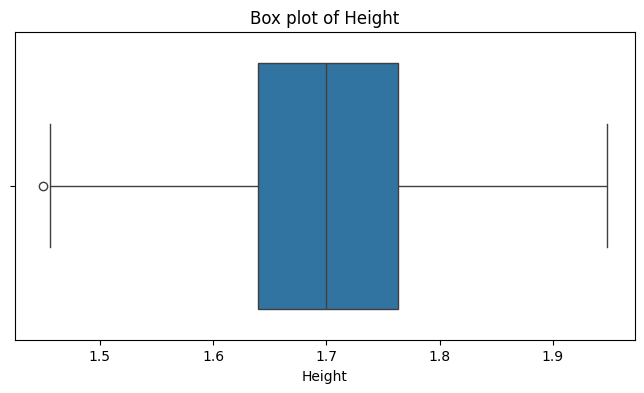

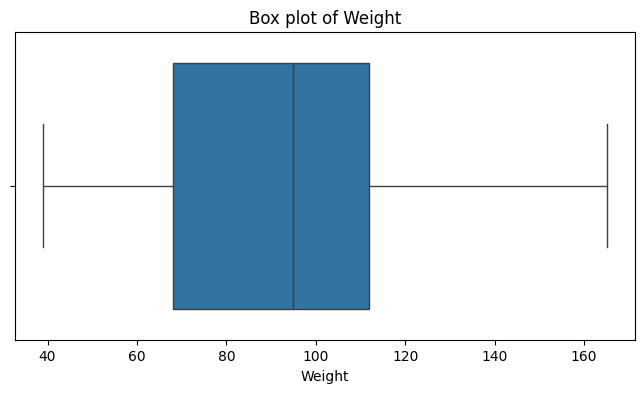

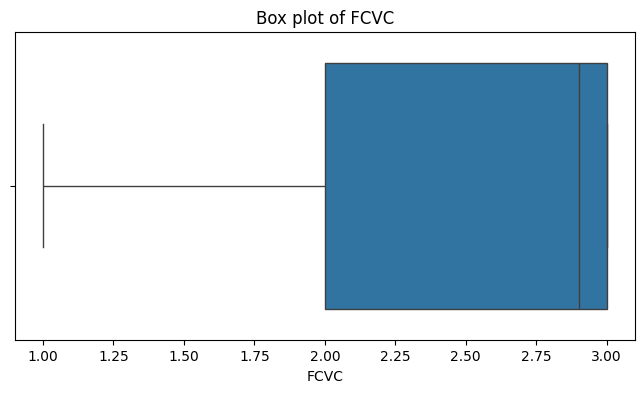

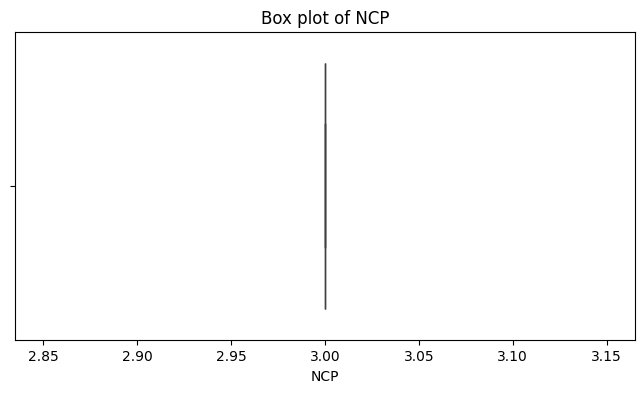

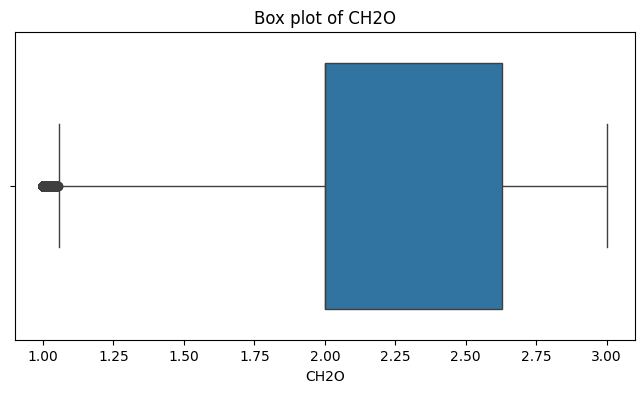

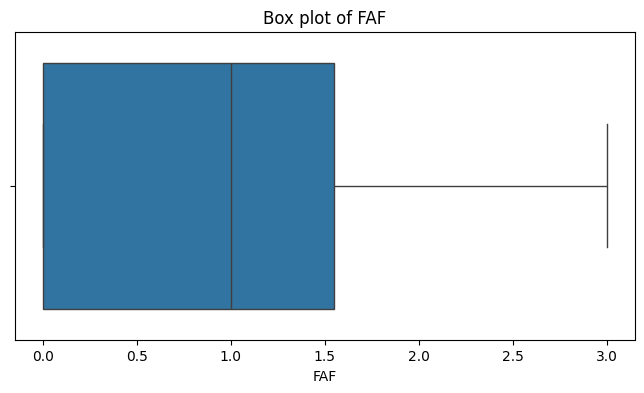

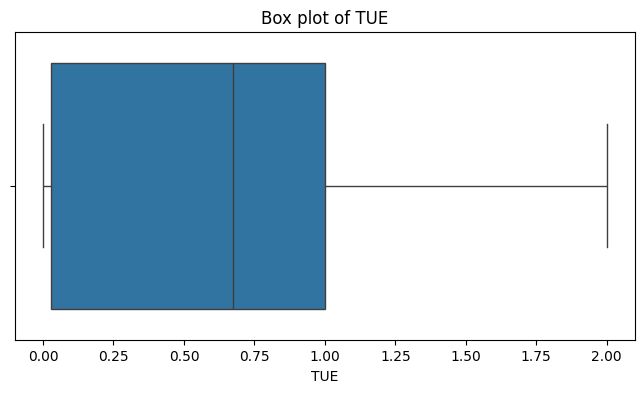

In [ ]:
# Box plots for numerical columns to identify outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df_clean[col])
    plt.title(f'Box plot of {col}')
    plt.show()


**Relationship between Features and Target:** Understands how the features relate to the target variable.


In [ ]:
categorical_cols

[]

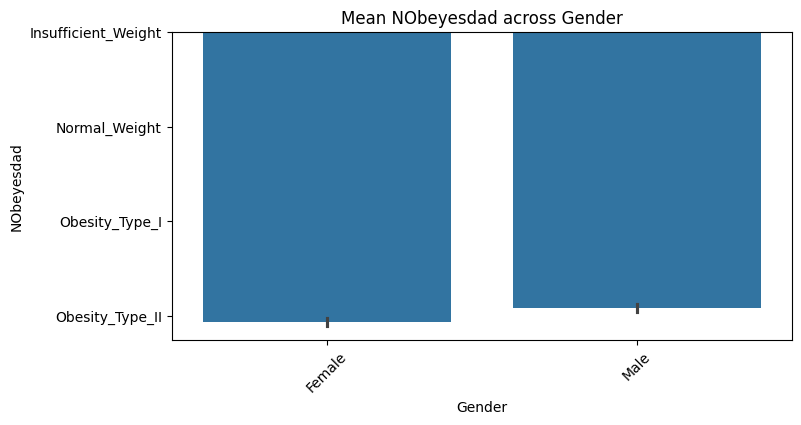

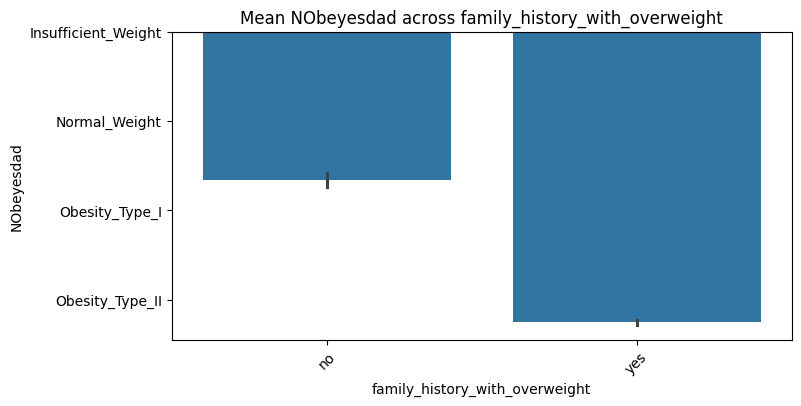

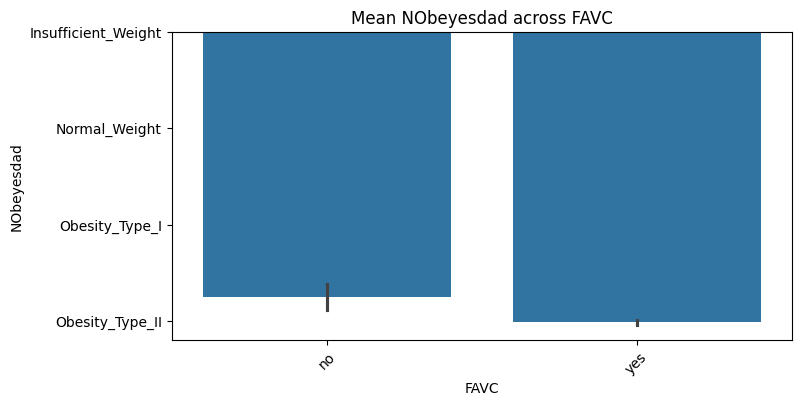

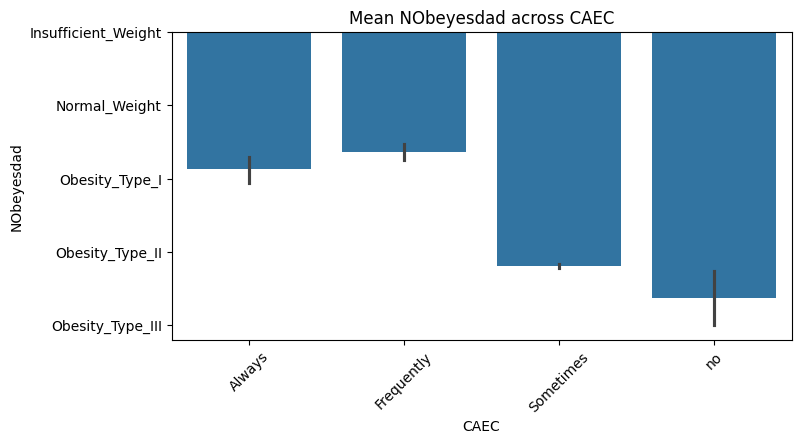

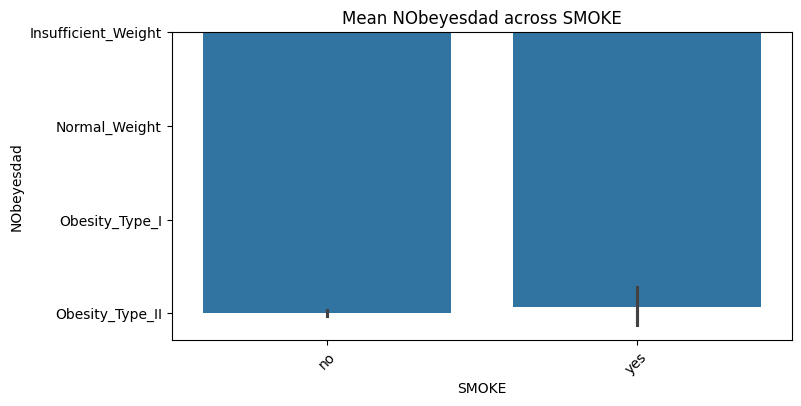

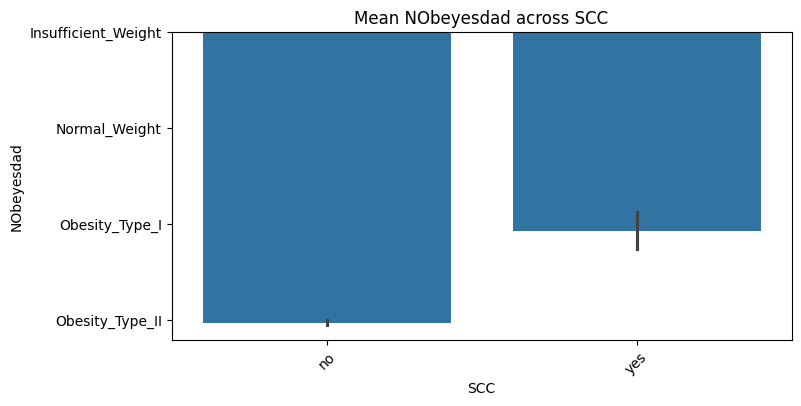

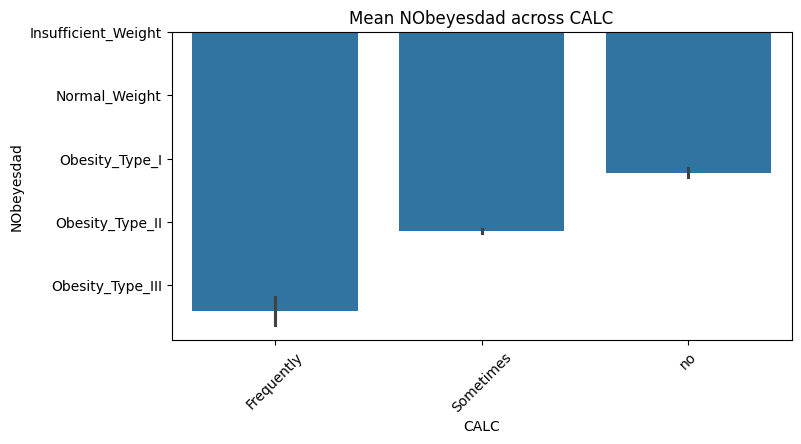

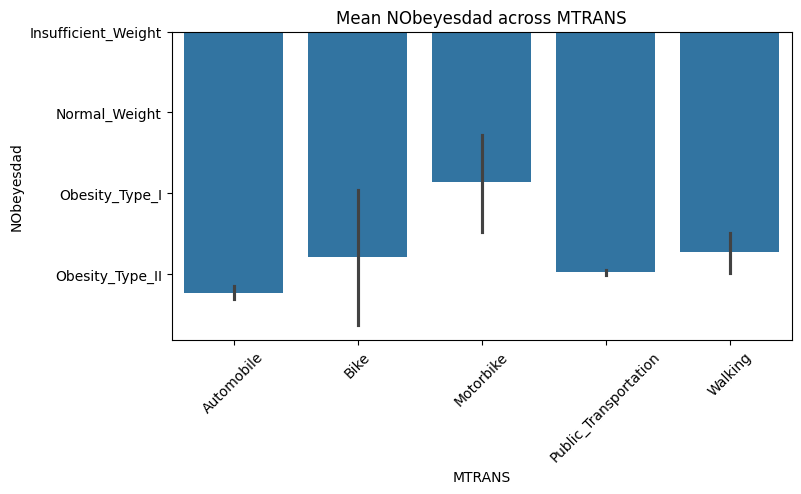

In [ ]:
# Relationship between features and the target variable
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=col, y='NObeyesdad', data=train_df_clean)
    plt.title(f'Mean NObeyesdad across {col}')
    plt.xticks(rotation=45)
    plt.show()


# Model Building

In [13]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model on the training data
xgb_model.fit(X_train_transformed, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = xgb_model.predict(X_test_transformed)

# Convert encoded predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9091880341880342


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_transformed, y_train_encoded)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Best score found:  0.9220975783475783


In [ ]:
best_model = grid_search.best_estimator_
xTest = test_data.drop(['id'], axis=1)
xTest = preprocessor.transform(xTest)
testPredictions = best_model.predict(xTest)
testPredictionsLabels = label_encoder.inverse_transform(testPredictions)
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(testPredictionsLabels, columns=['NObeyesdad'])

# Add the original 'id' column from the testDf to the predictions DataFrame
predictions_df['id'] = test_data['id'].values

# Rearrange the columns so 'id' comes first
predictions_df = predictions_df[['id', 'NObeyesdad']]

predictions_df.to_csv('/kaggle/working/predictions.csv', index=False)

# Now predictions_df has the original 'id' alongside the predicted 'NObeyesdad' labels
predictions_df.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(500, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

# Fit RandomizedSearchCV
random_search.fit(X_train_transformed, y_train_encoded)

# Output the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'colsample_bytree': 0.689707723784224, 'gamma': 0.35608961067376793, 'learning_rate': 0.05744981749936002, 'max_depth': 7, 'n_estimators': 803, 'subsample': 0.8985965620472096}
Best score found:  0.9237001424501424


In [ ]:
best_model = random_search.best_estimator_
xTest = test_data.drop(['id'], axis=1)
xTest = preprocessor.transform(xTest)
testPredictions = best_model.predict(xTest)
testPredictionsLabels = label_encoder.inverse_transform(testPredictions)
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(testPredictionsLabels, columns=['NObeyesdad'])

# Add the original 'id' column from the testDf to the predictions DataFrame
predictions_df['id'] = test_data['id'].values

# Rearrange the columns so 'id' comes first
predictions_df = predictions_df[['id', 'NObeyesdad']]

predictions_df.to_csv('/kaggle/working/predictions3.csv', index=False)

# Now predictions_df has the original 'id' alongside the predicted 'NObeyesdad' labels
predictions_df.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [ ]:
from scipy.stats import randint, uniform
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the parameter grid for LGBM
param_grid_lgbm = {
    'num_leaves': [31, 50, 70],
    'min_child_samples': [20, 50, 100],
    'min_child_weight': [0.001, 0.01],
    'subsample': [0.8, 1.0],  # Fraction of samples to be used for fitting the individual trees
    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0.0, 0.5, 1.0],  # L1 regularization term on weights
    'reg_lambda': [0.0, 0.5, 1.0],  # L2 regularization term on weights
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500]
}

# Initialize the GridSearchCV for LGBM
grid_search_lgbm = GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid_lgbm,
                                cv=3, verbose=2, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search_lgbm.fit(X_train_transformed, y_train_encoded)

# Output the best parameters and score for LGBM
print("Best parameters found for LGBM: ", grid_search_lgbm.best_params_)
print("Best score found for LGBM: ", grid_search_lgbm.best_score_)


Fitting 3 folds for each of 5832 candidates, totalling 17496 fits


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Initialize the GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf,
                              cv=3, verbose=2, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(X_train_transformed, y_train_encoded)

# Output the best parameters and score for RandomForestClassifier
print("Best parameters found for RandomForest: ", grid_search_rf.best_params_)
print("Best score found for RandomForest: ", grid_search_rf.best_score_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found for RandomForest:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Best score found for RandomForest:  0.8935328344934059


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


# Define the parameter grid for LGBMClassifier, explicitly using GBDT
param_grid_lgbm = {
    'boosting_type': ['gbdt'],  # Use GBDT; this is actually the default in LightGBM
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [400, 500, 600],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the LGBMClassifier with boosting_type set to 'gbdt'
lgbm_gbdt = LGBMClassifier(boosting_type='gbdt', random_state=42)

# Initialize the GridSearchCV for LGBMClassifier
grid_search_lgbm_gbdt = GridSearchCV(estimator=lgbm_gbdt, param_grid=param_grid_lgbm,
                                     cv=3, verbose=2, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search_lgbm_gbdt.fit(X_train_transformed, y_train_encoded)

# Output the best parameters and score for LGBMClassifier using GBDT
print("Best parameters found for LGBM with GBDT: ", grid_search_lgbm_gbdt.best_params_)
print("Best score found for LGBM with GBDT: ", grid_search_lgbm_gbdt.best_score_)


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2037
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 28
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625
Best parameters found for LGBM with GBDT:  {'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 20, 'min_child_samples': 50, 'n_estimators': 500, 'num_leaves': 50, 'subsample': 0.8}
Best score found for LGBM with GBDT:  0.9080455561299

In [ ]:
grid_search_lgbm_gbdt.best_estimator_

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=20,
               min_child_samples=50, n_estimators=500, num_leaves=50,
               random_state=42, subsample=0.8)

In [ ]:
testPredictions = grid_search_lgbm_gbdt.best_estimator_.predict(xTest)
testPredictionsLabels = label_encoder.inverse_transform(testPredictions)
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(testPredictionsLabels, columns=['NObeyesdad'])

# Add the original 'id' column from the testDf to the predictions DataFrame
predictions_df['id'] = testDf['id'].values

# Rearrange the columns so 'id' comes first
predictions_df = predictions_df[['id', 'NObeyesdad']]

#predictions_df.to_csv('/kaggle/working/predictions3.csv', index=False)

# Now predictions_df has the original 'id' alongside the predicted 'NObeyesdad' labels
predictions_df.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [ ]:
predictions_df.to_csv('/kaggle/working/predictions_LGBMClassifier.csv', index=False)

In [ ]:
from lightgbm import LGBMClassifier

lgb_params = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'random_state': 42,
    'num_class': 7,
    'learning_rate': 0.03096221154683276,
    'n_estimators': 500,
    'lambda_l1': 0.009667446568254372,
    'lambda_l2': 0.040186414373018,
    'max_depth': 10,
    'colsample_bytree': 0.4097712934687264,
    'subsample': 0.9535797422450176,
    'min_child_samples': 26
}

lgb_model_final = LGBMClassifier(**lgb_params).fit(X_train_transformed, y_train_encoded)

In [ ]:
testPredictions = lgb_model_final.predict(xTest)
testPredictionsLabels = label_encoder.inverse_transform(testPredictions)
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(testPredictionsLabels, columns=['NObeyesdad'])

# Add the original 'id' column from the testDf to the predictions DataFrame
predictions_df['id'] = testDf['id'].values

# Rearrange the columns so 'id' comes first
predictions_df = predictions_df[['id', 'NObeyesdad']]

# Now predictions_df has the original 'id' alongside the predicted 'NObeyesdad' labels
predictions_df.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [ ]:
predictions_df.to_csv('/kaggle/working/predictions_LGBMClassifier_improved.csv', index=False)

# Conclusion
In this project, we utilized a multi-class prediction approach to assess the risk of obesity based on various factors, including dietary habits, physical activity, and genetic predispositions. The analysis was conducted using a comprehensive dataset that allowed us to explore the multifaceted nature of obesity and its underlying causes.

From our exploratory data analysis, we identified key trends and relationships between the predictors and obesity levels, providing valuable insights into the factors that contribute most significantly to obesity risk. Following this, we applied several machine learning models to predict the obesity risk categories. The models were evaluated based on their accuracy, precision, recall, and F1 scores to ensure robust performance across different classes.

Our best-performing model demonstrated a promising ability to classify individuals into the correct obesity risk categories, highlighting its potential utility in preventive health strategies and interventions. This model can be particularly useful for healthcare providers and policymakers in designing targeted obesity prevention programs.

However, it is important to acknowledge the limitations of our analysis. The predictive power of our models is constrained by the quality and completeness of the data. Additionally, obesity is a complex condition influenced by a wide range of factors, not all of which may have been captured in this study. Future work should aim to incorporate more diverse datasets and explore more sophisticated modeling techniques to improve prediction accuracy and better understand the intricate dynamics of obesity risk.

In conclusion, this project represents a significant step towards leveraging data science and machine learning techniques in the fight against obesity. By identifying key predictors and developing accurate prediction models, we can enhance our understanding of obesity and contribute to more effective prevention and treatment strategies.